In [ ]:
import pandas as pd
caminho = "C:/Users/esped/OneDrive/2.Contas_casa/2024_Treino_Marombeiros.xlsx"
colunas = ['Data', 'Janaina', 'Espedito']
df_tabela = pd.read_excel(io=caminho, sheet_name='Base', usecols=colunas)

In [2]:
df_tabela.head(5)

,Data,Janaina,Espedito
0,2024-01-01,-,-
1,2024-01-02,-,-
2,2024-01-03,-,-
3,2024-01-04,-,-
4,2024-01-05,-,-


In [3]:
df_tabela.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Data      397 non-null    datetime64[ns]
 1   Janaina   13 non-null     object        
 2   Espedito  13 non-null     object        
dtypes: datetime64[ns](1), object(2)
memory usage: 9.4+ KB


In [4]:
from datetime import datetime
import numpy as np

# Obtenha a data atual
data_atual = datetime.now()
print("Data Atual:", data_atual)

# Formate a data como string
data_formatada_str = data_atual.strftime("%Y-%m-%d")

# Converta para datetime64[ns]
data_formatada = np.datetime64(data_formatada_str)

print("Data Atual Formatada:", data_formatada)

Data Atual: 2024-01-13 23:00:15.985981
Data Atual Formatada: 2024-01-13


In [13]:
# Mantendo apenas os registros anteriores à data_formatada
df_tabela_filtrada = df_tabela[df_tabela['Data'] <= data_formatada]
df_tabela_filtrada.shape


(13, 3)

In [57]:
# df_tabela_filtrada = df_tabela_filtrada[df_tabela_filtrada['Data'] > np.datetime64('2024-01-11')]
# df_tabela_filtrada.shape

(1, 6)

In [14]:
df_tabela_filtrada.head()

,Data,Janaina,Espedito
0,2024-01-01,-,-
1,2024-01-02,-,-
2,2024-01-03,-,-
3,2024-01-04,-,-
4,2024-01-05,-,-


In [15]:
df_tabela_filtrada['Dia_Semana'] = df_tabela_filtrada['Data'].dt.day_name()
df_tabela_filtrada['Mes'] = df_tabela_filtrada['Data'].dt.month_name()  
df_tabela_filtrada['Ano'] = df_tabela_filtrada['Data'].dt.year

C:\Users\esped\AppData\Local\Temp\ipykernel_18308\729188178.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tabela_filtrada['Dia_Semana'] = df_tabela_filtrada['Data'].dt.day_name()
C:\Users\esped\AppData\Local\Temp\ipykernel_18308\729188178.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tabela_filtrada['Mes'] = df_tabela_filtrada['Data'].dt.month_name()
C:\Users\esped\AppData\Local\Temp\ipykernel_18308\729188178.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice f

In [16]:
df_tabela_filtrada.head()

,Data,Janaina,Espedito,Dia_Semana,Mes,Ano
0,2024-01-01,-,-,Monday,January,2024
1,2024-01-02,-,-,Tuesday,January,2024
2,2024-01-03,-,-,Wednesday,January,2024
3,2024-01-04,-,-,Thursday,January,2024
4,2024-01-05,-,-,Friday,January,2024


In [17]:
df_janaina = df_tabela_filtrada.drop(columns=['Espedito']).rename(columns={'Janaina': 'Status'})
df_janaina['Nome'] = 'Janaina'
df_espedito = df_tabela_filtrada.drop(columns=['Janaina']).rename(columns={'Espedito': 'Status'})
df_espedito['Nome'] = 'Espedito'

In [18]:
df_janaina

,Data,Status,Dia_Semana,Mes,Ano,Nome
0,2024-01-01,-,Monday,January,2024,Janaina
1,2024-01-02,-,Tuesday,January,2024,Janaina
2,2024-01-03,-,Wednesday,January,2024,Janaina
3,2024-01-04,-,Thursday,January,2024,Janaina
4,2024-01-05,-,Friday,January,2024,Janaina
5,2024-01-06,-,Saturday,January,2024,Janaina
6,2024-01-07,-,Sunday,January,2024,Janaina
7,2024-01-08,-,Monday,January,2024,Janaina
8,2024-01-09,-,Tuesday,January,2024,Janaina
9,2024-01-10,-,Wednesday,January,2024,Janaina


In [19]:
# Concatenando os DataFrames ao longo das linhas (eixo 0)
base_dados = pd.concat([df_janaina, df_espedito]).sort_values(by=['Data'])
base_dados.head(30)

,Data,Status,Dia_Semana,Mes,Ano,Nome
0,2024-01-01,-,Monday,January,2024,Janaina
0,2024-01-01,-,Monday,January,2024,Espedito
1,2024-01-02,-,Tuesday,January,2024,Janaina
1,2024-01-02,-,Tuesday,January,2024,Espedito
2,2024-01-03,-,Wednesday,January,2024,Janaina
2,2024-01-03,-,Wednesday,January,2024,Espedito
3,2024-01-04,-,Thursday,January,2024,Janaina
3,2024-01-04,-,Thursday,January,2024,Espedito
4,2024-01-05,-,Friday,January,2024,Janaina
4,2024-01-05,-,Friday,January,2024,Espedito


# Analise: Gráfica

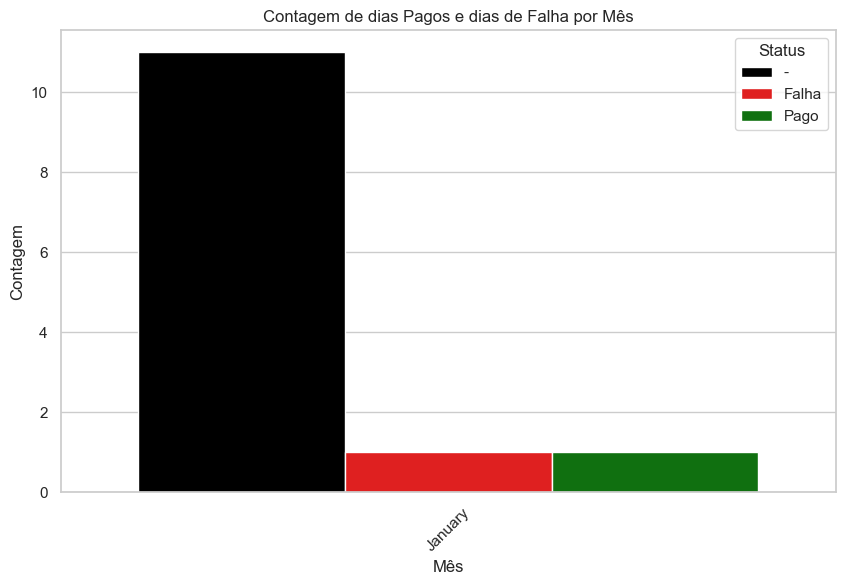

In [26]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# Usando o Seaborn para criar o gráfico de barras
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

cores_personalizadas = {
    '-': 'black',
    'Pago': 'green', 
    'Falha': 'red'}
# Criando o gráfico de barras
sns.countplot(x='Mes', hue='Status', data=base_dados[base_dados['Nome']=='Espedito'], palette=cores_personalizadas)
plt.xticks(rotation=45)
# Adicionando rótulos e título
plt.xlabel('Mês')
plt.ylabel('Contagem')
plt.title('Contagem de dias Pagos e dias de Falha por Mês')
# Salvando o gráfico como imagem (por exemplo, formato PNG)
plt.savefig('grafico_seaborn.png')

# Exibindo o gráfico
plt.show()

In [22]:
base_dados.tail(6)

,Data,Status,Dia_Semana,Mes,Ano,Nome
10,2024-01-11,-,Thursday,January,2024,Espedito
10,2024-01-11,-,Thursday,January,2024,Janaina
11,2024-01-12,Falha,Friday,January,2024,Espedito
11,2024-01-12,Pago,Friday,January,2024,Janaina
12,2024-01-13,Falha,Saturday,January,2024,Janaina
12,2024-01-13,Pago,Saturday,January,2024,Espedito


# Contagem Mês

In [23]:
# Contando os registros com base no Mês
contagem_mes = base_dados.groupby(['Mes', 'Nome', 'Status']).size().reset_index(name='Contagem_mes')
contagem_mes.head()


,Mes,Nome,Status,Contagem_mes
0,January,Espedito,-,11
1,January,Espedito,Falha,1
2,January,Espedito,Pago,1
3,January,Janaina,-,11
4,January,Janaina,Falha,1


# Contagem Ano

In [24]:
# Contando os registros com base no Ano
contagem_ano = base_dados.groupby(['Ano', 'Nome', 'Status']).size().reset_index(name='Contagem_ano')
contagem_ano

,Ano,Nome,Status,Contagem_ano
0,2024,Espedito,-,11
1,2024,Espedito,Falha,1
2,2024,Espedito,Pago,1
3,2024,Janaina,-,11
4,2024,Janaina,Falha,1
5,2024,Janaina,Pago,1


# Contagem Status

In [25]:
# Contando os registros com base no Status
contagem_status = base_dados.groupby(['Nome', 'Status']).size().reset_index(name='Contagem_status')
contagem_status

,Nome,Status,Contagem_status
0,Espedito,-,11
1,Espedito,Falha,1
2,Espedito,Pago,1
3,Janaina,-,11
4,Janaina,Falha,1
5,Janaina,Pago,1
